In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data.csv", index_col=0)
data_x = np.array(data.iloc[:, :2600])
data_y = np.array(data["label"].apply(lambda x: {"star":  0 , "qso":  1 , "galaxy":  2 }[x]))
data_c = np.array(data["label"].apply(lambda x: {"star": "r", "qso": "g", "galaxy": "b"}[x]))

In [3]:
sample = data_x[rd.randint(0, 99)]
sample = sample/np.mean(sample)

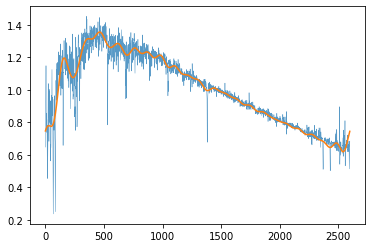

In [4]:
plt.plot(sample, lw=0.5, alpha=0.75, linestyle='-')

freq = np.fft.fft(sample)
freq[25:] = 0
trend = np.real(np.fft.fft(freq)[::-1])
trend = trend/np.mean(trend)
trend = trend + (trend - np.mean(trend))*1.05
plt.plot(trend, lw=1.5, linestyle='-')

plt.show()

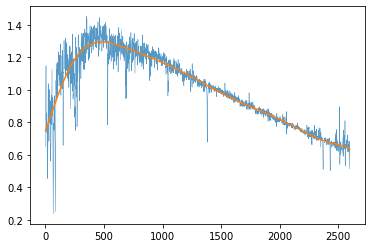

In [5]:
plt.plot(sample, lw=0.5, alpha=0.75, linestyle='-')

x, y = np.arange(len(sample)), sample
trend = np.polyval(np.polyfit(x, y, 9),x)
plt.plot(trend, lw=1.5, linestyle='-')

plt.show()

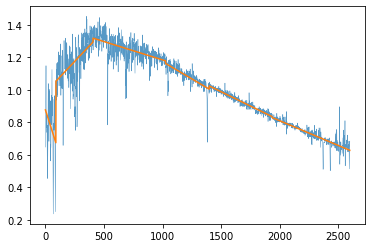

In [6]:
plt.plot(sample, lw=0.5, alpha=0.75, linestyle='-')

x, y = np.arange(len(sample)), sample
trend, cates, flag = np.zeros(len(x)), np.zeros(len(x)), 1
varia = np.std(y-trend)

for epoch in range(5):
    m, z = None, 1e100
    for i in range(len(x)):
        l, r = i, i
        while l >= 0 and cates[l] == cates[i]:l = l-1
        while r < len(cates) and cates[r] == cates[i]:r = r+1
        if i-l-1 < 2 or r - i < 2:continue
        l_v = np.polyval(np.polyfit(x[l+1:i], y[l+1:i], 1), x[l+1:i])
        l_r = np.polyval(np.polyfit(x[i:r], y[i:r], 1), x[i:r])
        t_c = trend.copy()
        t_c[l+1:i], t_c[i:r] = l_v, l_r
        i_v = np.std(y-t_c)
        i_v = i_v+100/((r-i)*(i-l))
        if i_v < z:m, z = i, i_v
    if m == None:break
    l, r = m, m
    while l >= 0 and cates[l] == cates[m]:l = l-1
    while r < len(cates) and cates[r] == cates[m]:r = r+1
    l_v = np.polyval(np.polyfit(x[l+1:m], y[l+1:m], 1), x[l+1:m])
    l_r = np.polyval(np.polyfit(x[m:r],   y[m:r],   1), x[m:r])
    trend[l+1:m], trend[m:r] = l_v,  l_r
    cates[l+1:m], flag = flag, flag+1
    varia = np.std(y-trend)

plt.plot(trend, lw=1.5, linestyle='-')

plt.show()

In [7]:
def subseq(seq, l, r):
    if l < 0:
        return np.concatenate((seq[l:], seq[:r]))
    if r >= len(seq):
        return np.concatenate((seq[l:], seq[:r%len(seq)]))
    return seq[l:r]

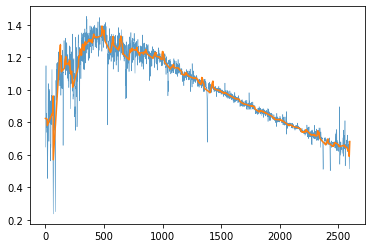

In [8]:
plt.plot(sample, lw=0.5, alpha=0.75, linestyle='-')

x, y = np.arange(len(sample)), sample
s, alpha = 25, 1
varia, trend, flags = np.zeros(len(x)), np.zeros(len(x)), np.ones(len(x))

for i in range(len(varia)):
    poly = np.polyfit(subseq(x, i-s, i+s), subseq(y, i-s, i+s), 1)
    varia[i] = np.std(np.polyval(poly, subseq(x, i-s, i+s)) - subseq(y, i-s, i+s))
mstd = np.argsort(varia)

while np.sum(flags) != 0:
    i, n, mstd = mstd[0], s, mstd[1:]
    l, r = i-n, i+n
    poly = np.polyfit(subseq(x, l, r), subseq(y, l, r), 1)
    while l >= 0 and flags[l] == 1:
        sub_l_std = np.std(subseq(y, l, i)- np.polyval(poly, subseq(x, l, i)))
        if sub_l_std >= varia[l]*alpha:break
        l = l - 1
    while r < len(x) and flags[r] == 1:
        sub_r_std = np.std(subseq(y, i, r)- np.polyval(poly, subseq(x, i, r)))
        if sub_r_std >= varia[r]*alpha:break
        r = r + 1
    trend[subseq(x, l, r)] = np.polyval(poly, subseq(x, l, r))
    flags[subseq(x, l, r)] = 0

plt.plot(trend, lw=1.5, linestyle='-')

plt.show()
